In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET
import os
from Levenshtein import distance

## Function to Parse XML Files

In [53]:
def parse_xml(xml_file):
    tree = ET.parse(xml_file)
    words = []
    for node in tree.findall('.//p/span'):
        words.append(node.text)

    #filter the words from xml file 

    filtered_words = []
    for word in words:
        if word == None:
            continue
        elif '[' not in word:
            if ':' not in word:
                filtered_words.append(word)

    #get sets of filtered words 
    set_filtered_words = set(filtered_words)
    #convert the lists to string
    filtered_words_str = ' '.join(filtered_words)

    return set_filtered_words, filtered_words_str

In [54]:
#list all files in the current directory
all_files = os.listdir()

#get xml files from all_files
xml_files = sorted([files for files in all_files if files.endswith('.xml')])[::-1]
#get all files that end with tiny.en.txt
tiny_files = sorted([files for files in all_files if files.endswith('tiny.en.txt')])[::-1]
#get all files that end with base.en.txt
base_files = sorted([files for files in all_files if files.endswith('base.en.txt')])[::-1]
#get all files that end with small.en.txt
small_files = sorted([files for files in all_files if files.endswith('small.en.txt')])[::-1]
#get all files that end with medium.en.txt
medium_files = sorted([files for files in all_files if files.endswith('medium.en.txt')])[::-1]

In [55]:
#assert that the number of files are equal

assert len(xml_files) == len(tiny_files) == len(base_files) == len(small_files) == len(medium_files)

## Calculate Jaccard Similarity between two txt files

In [56]:
def jaccard_similarity(list1:set, list2:set):
    #asswert input is a set
    assert type(list1) == set
    assert type(list2) == set
    intersection = len(list1.intersection(list2))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection / union)



## Calculate Levenshitn Similarity between two txt files


In [67]:
def levenshtein_distance(list1, list2):
    #assert input is a string
    assert type(list1) == str
    assert type(list2) == str
    #print(distance(list1, list2))
    return distance(list1, list2)/len(list1)

# Get Original Text

In [58]:
# get the original text from the xml file and save it in a txt file

for xml_file in xml_files:
    set_filtered_words, filtered_words_str = parse_xml(xml_file)
    with open(xml_file + '.txt', 'w') as f:
        f.write(filtered_words_str)

In [59]:
# get all .xml.txt files
xml_txt_files = sorted([files for files in os.listdir() if files.endswith('.xml.txt')])[::-1]

## Calculate the Jaccard Similarity and Levenshtein Distance between all $\textit{.xml.txt}$ files and $\textit{tiny.en.txt}$ files
 



In [68]:
# calulate the jaccard similarity and levenshtein distance for .xml.txt files and tiny.en.txt files
jaccard_similarity_tiny = []
levenshtein_distance_tiny = []

for xml_txt_file, tiny_file in zip(xml_txt_files, tiny_files):
    #read the xml.txt file
    with open(xml_txt_file, 'r') as f:
        xml_txt = f.read()
    
    #read the tiny.en.txt file
    with open(tiny_file, 'r') as f:
        tiny_txt = f.read()
    #lowercase both the txt list
    xml_txt = xml_txt.lower()
    tiny_txt = tiny_txt.lower()
    #create sets so that we can calculate the jaccard similarity
    xml_txt_set = set(xml_txt.split())
    tiny_txt_set = set(tiny_txt.split())

    jaccard_similarity_tiny.append(jaccard_similarity(xml_txt_set, tiny_txt_set))

    #calculate the levenshtein distance using the strings
    levenshtein_distance_tiny.append(levenshtein_distance(xml_txt, tiny_txt))

## Calculate the Jaccard Similarity and Levenshtein Distance between all $\textit{.xml.txt}$ files and $\textit{base.en.txt}$ files
 



In [69]:
# similarly calculate the jaccard similarity and levenshtein distance for .xml.txt files and base.en.txt files

jaccard_similarity_base = []
levenshtein_distance_base = []

for xml_txt_file, base_file in zip(xml_txt_files, base_files):
    #read the xml.txt file
    with open(xml_txt_file, 'r') as f:
        xml_txt = f.read()
    
    #read the base.en.txt file
    with open(base_file, 'r') as f:
        base_txt = f.read()
    #lowercase both the txt list
    xml_txt = xml_txt.lower()
    base_txt = base_txt.lower()
    #create sets so that we can calculate the jaccard similarity
    xml_txt_set = set(xml_txt.split())
    base_txt_set = set(base_txt.split())

    jaccard_similarity_base.append(jaccard_similarity(xml_txt_set, base_txt_set))

    #calculate the levenshtein distance using the strings
    levenshtein_distance_base.append(levenshtein_distance(xml_txt, base_txt))

## Calculate the Jaccard Similarity and Levenshtein Distance between all $\textit{.xml.txt}$ files and $\textit{small.en.txt}$ files
 



In [70]:
# calculate the jaccard similarity and levenshtein distance for .xml.txt files and small.en.txt files

jaccard_similarity_small = []   
levenshtein_distance_small = []

for xml_txt_file, small_file in zip(xml_txt_files, small_files):
    #read the xml.txt file
    with open(xml_txt_file, 'r') as f:
        xml_txt = f.read()
    
    #read the small.en.txt file
    with open(small_file, 'r') as f:
        small_txt = f.read()
    #lowercase both the txt list
    xml_txt = xml_txt.lower()
    small_txt = small_txt.lower()
    #create sets so that we can calculate the jaccard similarity
    xml_txt_set = set(xml_txt.split())
    small_txt_set = set(small_txt.split())

    jaccard_similarity_small.append(jaccard_similarity(xml_txt_set, small_txt_set))

    #calculate the levenshtein distance using the strings
    levenshtein_distance_small.append(levenshtein_distance(xml_txt, small_txt))
    

## Calculate the Jaccard Similarity and Levenshtein Distance between all $\textit{.xml.txt}$ files and $\textit{medium.en.txt}$ files
 



In [71]:
# similarly calculate the jaccard similarity and levenshtein distance for .xml.txt files and medium.en.txt files

jaccard_similarity_medium = []
levenshtein_distance_medium = []

for xml_txt_file, medium_file in zip(xml_txt_files, medium_files):
    #read the xml.txt file
    with open(xml_txt_file, 'r') as f:
        xml_txt = f.read()
    
    #read the medium.en.txt file
    with open(medium_file, 'r') as f:
        medium_txt = f.read()
    #lowercase both the txt list
    xml_txt = xml_txt.lower()
    medium_txt = medium_txt.lower()
    #create sets so that we can calculate the jaccard similarity
    xml_txt_set = set(xml_txt.split())
    medium_txt_set = set(medium_txt.split())

    jaccard_similarity_medium.append(jaccard_similarity(xml_txt_set, medium_txt_set))

    #calculate the levenshtein distance using the strings
    levenshtein_distance_medium.append(levenshtein_distance(xml_txt, medium_txt))

# Ploting the graphs

### Graph of Jaccard Similarity over the models

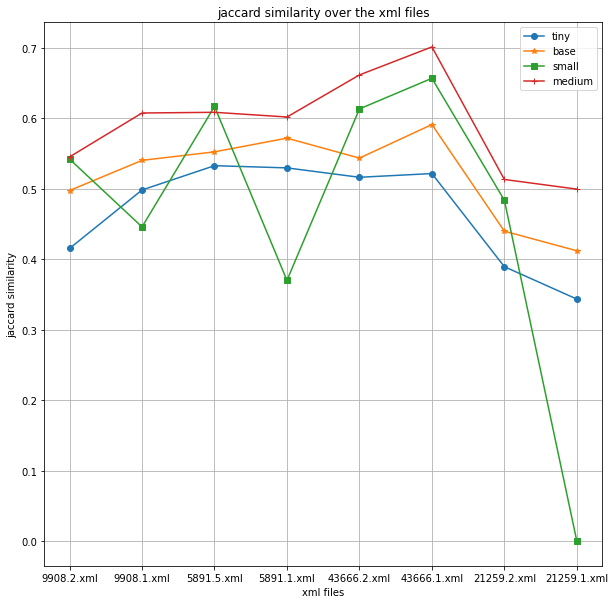

In [72]:
# plot jaccard similarity over the xml files

plt.figure(figsize=(10, 10))
plt.plot(jaccard_similarity_tiny, label='tiny', marker='o')
plt.plot(jaccard_similarity_base, label='base', marker='*')
plt.plot(jaccard_similarity_small, label='small', marker='s')
plt.plot(jaccard_similarity_medium, label='medium', marker='+')
plt.legend()
plt.xticks([0,1,2,3,4,5,6,7], xml_files)
plt.xlabel('xml files')
plt.ylabel('jaccard similarity')
plt.title('jaccard similarity over the xml files')
plt.grid()
plt.show()

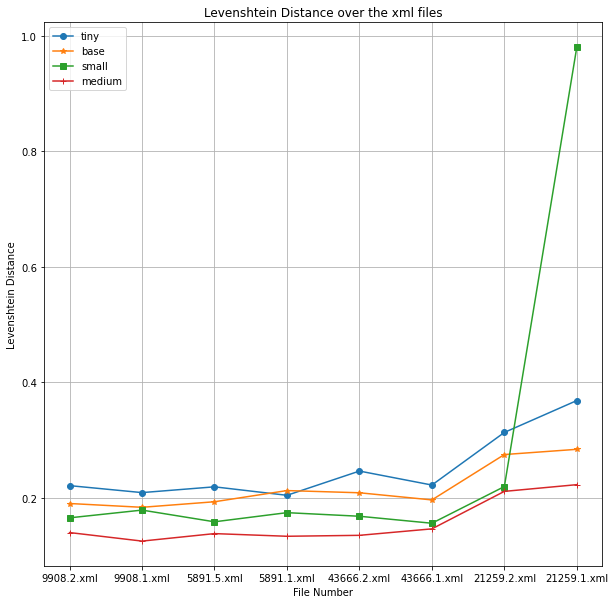

In [73]:
# plot levenshtein distance over the 8 files

plt.figure(figsize=(10, 10))
plt.plot(levenshtein_distance_tiny, label='tiny', marker='o')
plt.plot(levenshtein_distance_base, label='base', marker='*')
plt.plot(levenshtein_distance_small, label='small', marker='s')
plt.plot(levenshtein_distance_medium, label='medium', marker='+')
plt.legend()
plt.xticks([0,1,2,3,4,5,6,7], xml_files)
plt.xlabel('File Number')
plt.ylabel('Levenshtein Distance')
plt.title('Levenshtein Distance over the xml files')
plt.grid()
plt.show()